We will build regression models to predict the price of a house. We will employ Ordinary Least Squares Regression, LASSO, Ridge and Elastic Net.
- We may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
- As we go through the steps we will explain why we chose our approach, and why it's the best approach for the data provided.


To tackle this problem I will build an OLS Regression statsmodel and the following ML models: OLS Regression, LASSO, Ridge and Elastic Net to figure out which model works best with the given dataset. I will determine which model is the best using their root-mean-square error.

Let us begin by importing the required libraries and our data

In [606]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [607]:
df = pd.read_csv("kc_house_data.csv")

Let's use the head function to get an idea of what the data looks like

In [608]:
pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [609]:
#Now let's use the info() function to assess any structural issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Great, it looks like we don't have any missing values!
Let's take a look at the descriptive statistics of our dataset.

In [610]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Since there are a lot of different years in which houses have been built and renovated, I will do some feature engineering. I will group them based on the year they were built/renovated.

In [611]:
def into_built_group(year):
    if year >= 1900 and year <= 1928:
        return 'oldest'
    elif year >= 1929 and year <= 1957:
        return 'old'
    elif year >= 1958 and year <= 1986:
        return 'new'
    elif year >= 1987 and year <= 2015:
        return 'newest'
    else:
        return 'OutOfRange'

df['built_group'] = df['yr_built'].apply(into_built_group)

Let's make sure that we didn't miss any observations.

In [612]:
df[df['built_group'] == 'OutOfRange']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,built_group


In [613]:
# Find the minimum non-zero value of the yr_renovated column
min_nonzero = np.min(df.loc[df['yr_renovated'] > 0, 'yr_renovated'])

print("Minimum non-zero value of yr_renovated column:", min_nonzero)

Minimum non-zero value of yr_renovated column: 1934


In [614]:
def into_reno_group(year):
    if year == 0:
        return 'never'
    elif year >= 1934 and year <= 1954:
        return 'oldest'
    elif year >= 1955 and year <= 1975:
        return 'old'
    elif year >= 1976 and year <= 1996:
        return 'new'
    elif year >= 1997 and year <= 2015:
        return 'newest'
    else:
        return 'OutOfRange'

df['reno_group'] = df['yr_renovated'].apply(into_reno_group)

Let's make sure that we didn't miss any observations.

In [615]:
df[df['reno_group'] == 'OutOfRange']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,built_group,reno_group


Since we don't have any missing data we will not need to use any imputation methods. However, we will need to treat any outliers as regression models are sensitve to them. Thus we will elimnate outliers so that we can make our model(s) more precise. So let's look for any price outliers.

<Axes: ylabel='price'>

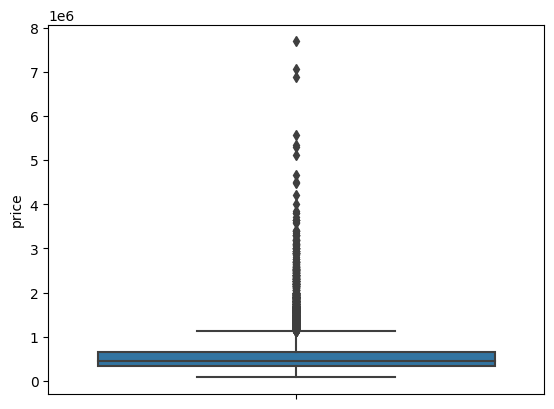

In [616]:
sns.boxplot(data = df, y='price')

array([[<Axes: title={'center': 'price'}>]], dtype=object)

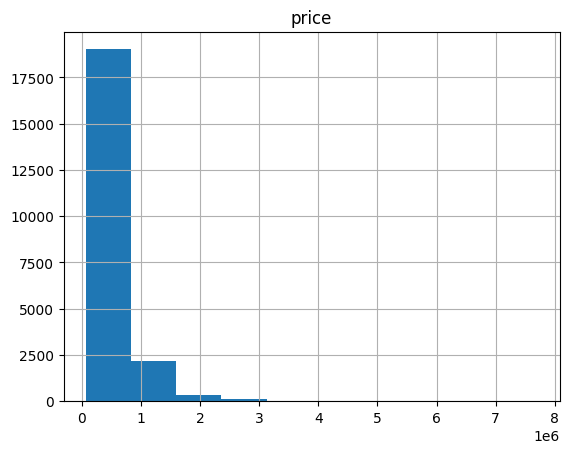

In [617]:
#Analyze price
df.hist(['price'])

array([[<Axes: title={'center': 'price'}>]], dtype=object)

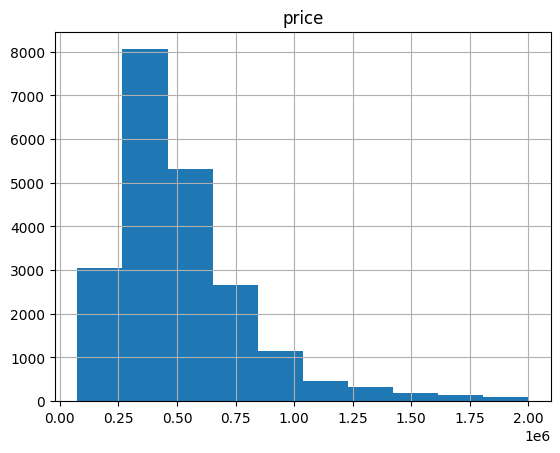

In [618]:
#Analyze price with price less that 2 million
less_than_2M = df[df['price'] < 2000000]
less_than_2M.hist(['price'])

array([[<Axes: title={'center': 'price'}>]], dtype=object)

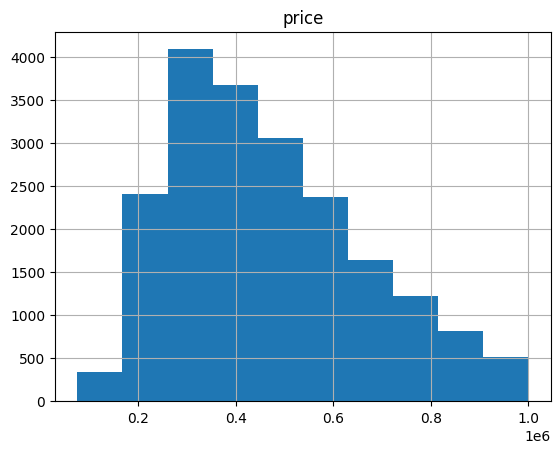

In [619]:
#Analyze price with price less that 1 million
less_than_1M = df[df['price'] < 1000000]
less_than_1M.hist(['price'])

From the boxplots and histograms above we can see that we have a lot of price outliers that can have a strong effect on our model and cause it to perform poorly. We definitely want to eliminate them. We will assume that the models we build will be best suited for the majority of the population that would like to purchase a house that falls under the $1M price range.

Let's just get the mean sqaured error for an ols model using all of the features (except id and date since they should not have an effect on price) and no data cleaning and see what we get.

In [620]:
results = ols("price ~  bedrooms + bathrooms + sqft_living	+ sqft_lot	+ floors	+ waterfront	+ view	+ condition	+ grade	+ sqft_above	+ sqft_basement	+ built_group	+ reno_group	+ zipcode	+ lat	+ long	+ sqft_living15	+ sqft_lot15", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2329.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:26:03   Log-Likelihood:            -2.9447e+05
No. Observations:               21613   AIC:                         5.890e+05
Df Residuals:                   21590   BIC:                         5.892e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.185e+

In [621]:
pred_vals = results.predict(df[['bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot' , 'floors' , 'waterfront'	, 'view' , 'condition',  'grade', 'sqft_above' , 'sqft_basement', 'built_group', 'reno_group', 'zipcode', 'lat',	'long', 'sqft_living15', 'sqft_lot15']])

In [622]:
pred_vals

0        243600.187219
1        701002.392365
2        367059.625381
3        419030.044864
4        422316.773475
             ...      
21608    485834.297488
21609    469761.037861
21610    161593.565304
21611    398592.650954
21612    161600.172490
Length: 21613, dtype: float64

In [623]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [624]:
res

,y_hat,price
0,243600.187219,221900.0
1,701002.392365,538000.0
2,367059.625381,180000.0
3,419030.044864,604000.0
4,422316.773475,510000.0
...,...,...
21608,485834.297488,360000.0
21609,469761.037861,400000.0
21610,161593.565304,402101.0
21611,398592.650954,400000.0


In [625]:
res['error'] = res['y_hat'] - res['price']

In [626]:
res.head(1)

,y_hat,price,error
0,243600.187219,221900.0,21700.187219


In [627]:
res['sq_error'] = res['error']**2

In [628]:
np.sqrt(res['sq_error'].mean())

199897.89024614624

We can see that this model give us an rmse of 199897, let's see if we can reduce this with some data cleaning.

(array([2.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00, 1.1000e+01,
        6.4000e+01, 2.9000e+02, 1.3565e+04, 7.6270e+03, 4.7000e+01]),
 array([-4414858.49096771, -3855749.04221919, -3296639.59347066,
        -2737530.14472213, -2178420.6959736 , -1619311.24722507,
        -1060201.79847654,  -501092.34972802,    58017.09902051,
          617126.54776904,  1176235.99651757]),
 <BarContainer object of 10 artists>)

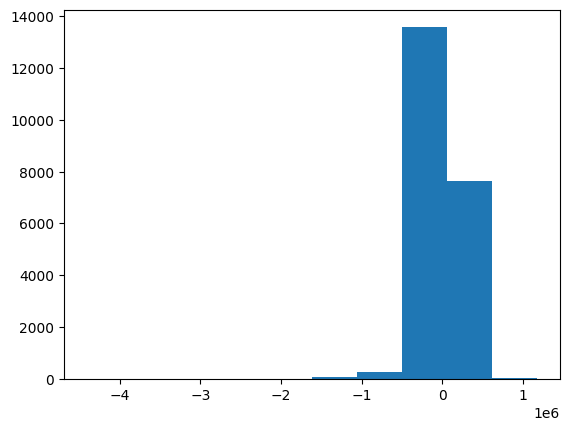

In [629]:
plt.hist(res['error'])

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-4414858.49096771, -4088322.5141138 , -3809125.05288608, ...,
          1106849.74006319,  1175146.87088033,  1176235.99651757])),
 (178317.96886506854, -2.889108279389486e-07, 0.8918864895479792))

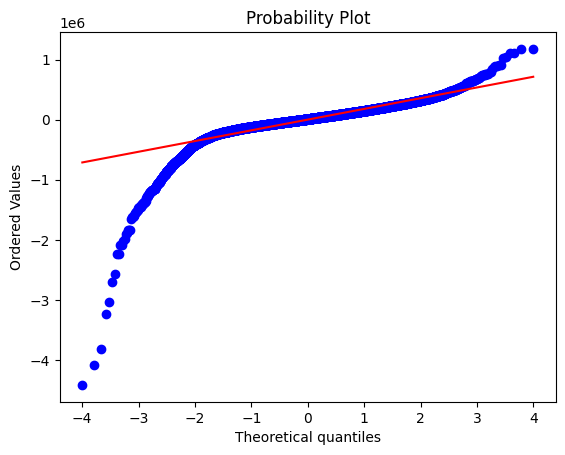

In [630]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

From the QQ plot and the histogram we can see that we don't have much of a normal distribution.

We got a root mean sqaured error of 199897. We can also notice that our features are able to explain 70% of the price. Now let's try the same thing but with price outliers eliminated so we will limit the prices to under 1 million. We will also eliminate other numerical outliers.

<Axes: ylabel='bedrooms'>

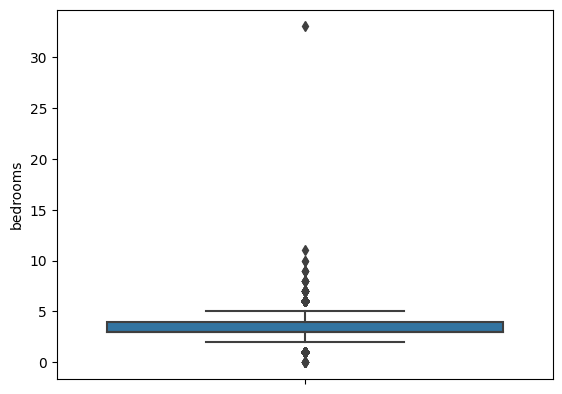

In [631]:
sns.boxplot(data = less_than_1M, y='bedrooms')

In [632]:
#Only keep observations that have bedrooms in the 2-5 range
less_than_1M = less_than_1M[less_than_1M['bedrooms'] > 1]
less_than_1M = less_than_1M[less_than_1M['bedrooms'] < 6]

<Axes: ylabel='bathrooms'>

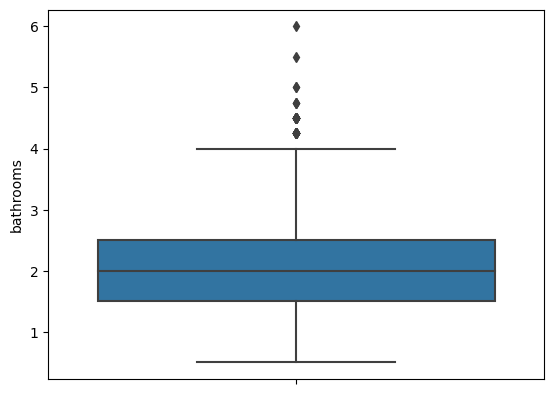

In [633]:
sns.boxplot(data = less_than_1M, y='bathrooms')

In [634]:
#Only keep observations where the number of bathrooms is 4 or less
less_than_1M = less_than_1M[less_than_1M['bathrooms'] <= 4]

Let's take a look at how much data we maintained after cleaning it.

In [635]:
# Count the number rows of our cleaned dataframe
count_less_than_1m = len(less_than_1M)

# Calculate the total number of rows in the original dataFrame
total_rows = len(df)

# Calculate the percentage
percentage_less_than_1m = (count_less_than_1m / total_rows) * 100

print(f"The percentage of data we have retained from the orginal dataframe is: {percentage_less_than_1m:.2f}%")

The percentage of data we have retained from the orginal dataframe is: 90.66%


Now let's run an OLS model with the cleaned data!

In [636]:
results = ols("price ~ bedrooms	+ bathrooms + sqft_living	+ sqft_lot	+ floors	+ waterfront	+ view	+ condition	+ grade	+ sqft_above	+ sqft_basement	+ built_group	+ reno_group	+ zipcode	+ lat	+ long	+ sqft_living15	+ sqft_lot15", data=less_than_1M).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2042.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:26:07   Log-Likelihood:            -2.5470e+05
No. Observations:               19594   AIC:                         5.095e+05
Df Residuals:                   19571   BIC:                         5.096e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -4.414e+

In [637]:
pred_vals = results.predict(less_than_1M[['bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot' , 'floors' , 'waterfront'	, 'view' , 'condition',  'grade', 'sqft_above' , 'sqft_basement', 'built_group', 'reno_group', 'zipcode', 'lat',	'long', 'sqft_living15', 'sqft_lot15']])

In [638]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),less_than_1M['price']], axis=1)

In [639]:
res['error'] = res['y_hat'] - res['price']

In [640]:
res['sq_error'] = res['error']**2

In [641]:
np.sqrt(res['sq_error'].mean())

106957.88902517638

Running our model on the cleaned dataset got the rmse down to 106957!

((array([-3.97375038, -3.75733424, -3.63890177, ...,  3.63890177,
          3.75733424,  3.97375038]),
  array([-615326.029173  , -503350.86617078, -500357.43052996, ...,
          469293.33595443,  479939.39448719,  506791.77547657])),
 (106072.40740006659, -7.50062281530564e-07, 0.9915282315148062))

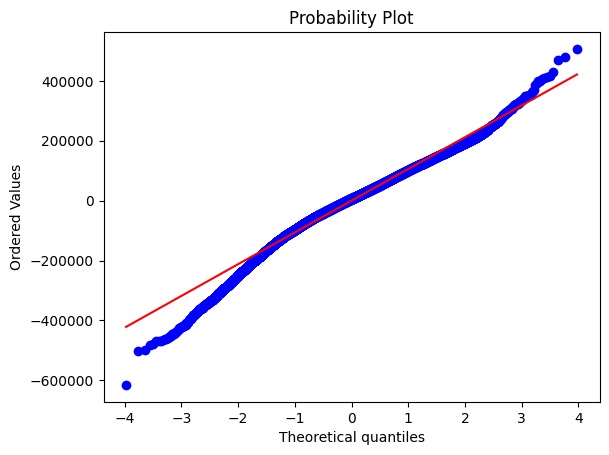

In [642]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

(array([2.000e+00, 4.500e+01, 2.570e+02, 1.006e+03, 3.839e+03, 8.790e+03,
        4.889e+03, 6.890e+02, 6.700e+01, 1.000e+01]),
 array([-615326.029173  , -503114.24870804, -390902.46824309,
        -278690.68777813, -166478.90731317,  -54267.12684821,
          57944.65361674,  170156.4340817 ,  282368.21454666,
         394579.99501162,  506791.77547657]),
 <BarContainer object of 10 artists>)

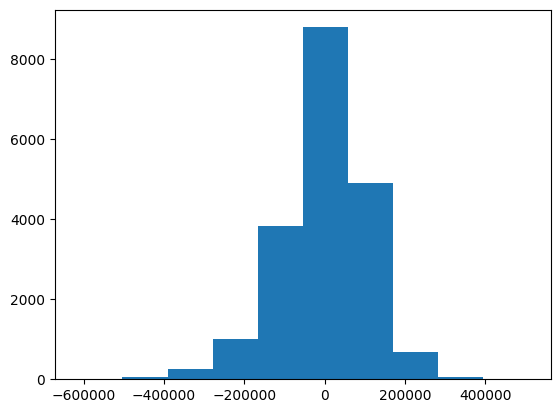

In [643]:
plt.hist(res['error'])

From the analysis above we can see that our features are still able to explain 69% of the price and our rmse is much lower now at 106957 which is great because we only eliminated 10% of our dataset to get rmse value of 92940 less. From our qq plot and historgram we can also see that our distribution is much closer to normal now.


Let's use the other three regression, LASSO, Ridge, and Elastic Net, and see if we can achieve better results.

In [644]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

In [645]:
# separate features and target
categorical_features = ['bedrooms','bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'built_group', 'reno_group', 'zipcode' ]
numerical_features = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long']
target = 'price'

In [646]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(less_than_1M[categorical_features + numerical_features]
                                                    ,less_than_1M[target],
                                                    test_size = 0.3, random_state=1234)

In [647]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [648]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [649]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [650]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'built_group', 'reno_group',
                                                   'zipcode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'long'])])),
                ('regressor', LinearRegression())])

In [651]:
pred = linear_regression.predict(X_test)

In [652]:
from sklearn.metrics import mean_squared_error

In [653]:
np.sqrt(mean_squared_error(pred,y_test))

79430.24732322243

In [654]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [655]:
ridge_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'built_group', 'reno_group',
                                                   'zipcode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'long'])])),
                ('regressor', Ridge(alpha=3.0))])

In [656]:
pred_ridge = ridge_regression.predict(X_test)


In [657]:
np.sqrt(mean_squared_error(pred_ridge,y_test))


79681.1831013175

In [658]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [659]:
lasso_regression.fit(X_train, y_train)


c:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294058840773.3594, tolerance: 51634838026.18528
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'built_group', 'reno_group',
                                                   'zipcode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'long'])])),
                ('regressor', Lasso())])

In [660]:
lasso_pred = lasso_regression.predict(X_test)


In [661]:
np.sqrt(mean_squared_error(lasso_pred, y_test))


79432.49716030617

In [662]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [663]:
elasticnet_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'built_group', 'reno_group',
                                                   'zipcode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'long'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [664]:
elasticnet_pred = elasticnet_regression.predict(X_test)


In [665]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))


116625.45967635352

## The data cleaning and transformation approach

So we have built 5 models: an OLS stats model and the following ML models: OLS regression, LASSO, Ridge, and Elastic Net. Before running each of the models I employed some data cleaning and feature engineering techniques.

Cleaning: We know that outliers can have a strong effect of regression models and cause them to perform poorly. Therefore I eliminated outliers in the following way.
- Removed observations where the number of bedrooms were not in the 2-5 range
- Removed observations where there were more than 4 bathrooms
- Removed observations where the price was a million or more.

To remove these outliers I analyzed the data by plotting boxplots and understanding where the outliers were.

In the models I kept all of the features except for id and date since those two features should have very little to no impact on the price of a house. I decided to keep the rest of the features so that our model can do a good job at predicting the price of a house given all of the features.

I also applied some feature engineering so that it is easier for the model to handle the data of the year the houses were built and renovated. To do this I understood the range of the years for the two columns and then I created sections for each of the observations to fall into. I named the new columns reno_group and built_group.

The built_group puts the observations into 4 different groups using the following criteria:
- 1900-1928: oldest
- 1929-1957: old
- 1958-1986: new
- 1987-2015: newest


The reno_group puts the observations into 5 different groups using the following criteria:
- houses that were never renovated: never 
- 1934-1954: oldest
- 1955-1975: old
- 1976-1996: new
- 1997-2015: newest


I believe that it was the right decision to eliminate outliers because it allowed us to still keep 90% of our data and also get a much better rmse. This means that we can still predict the prices for 90% of homes and we can do it much more accurately. That way we can serve a large portion of the market and we can do it well.


For the machine learning pipeline that is used by the OLS, LASSO, Ridge, and ElasticNet models, I used one hot encoding for the categorical features and scaled the numerical features using the standard scaler.

I used this approach because it allows us to analyze each model and understand which one works best for our given dataset.



## Model Evaluation

To evalute the models we can use the rmse that we extracted from each of them:

- OLS from statsmodels: 106957
- OLS from sklearn: 79430
- LASSO: 79432
- Ridge: 79681
- Elastic Net: 116625

From these values we can see that the LASSO, OLS from sklearn and Ridge models are clearly superior in comparison to OLS from statsmodels and Elastic Net. Given the tools we have we can say that the OLS model from sklearn is the best model we can build as we have found that this one has the lowest rmse value. This means that the average difference between the price the model predicts and the actual price of the homes is the lowest using this model. Therefore we should go with it as it should provide us with the best results.

## Question: What are the main drivers of house prices in King City? And how much do these drivers impact the price?

## Answer:
To understand the main drivers of house prices in King City we can take a look at the coefficients of our best model, the OLS from sklearn model. The larger the coefficient the greater the impact that feature has on the price for one unit increase of that feature. I have extracted the coefficients in the python cell below.

The top 5 drivers of house prices in King City are:
1. The year the house was built in (built_group)

The group representing the year the property was built is associated with a decrease in the predicted value of price. Being in a later built group is estimated to decrease the price by approximately $75907.15. Perhaps older homes are located in more expensive areas.

2. The square footage of the basement.

An increase in the square footage of the basement area is associated with an increase the predicted value of price. Each additional square foot of basement area is estimated to increase the price by approximately $21103.69.

3. The longitude position of the house.

An increase in the longitude of the house is associated with an increase in the predicted value of price. Each one-degree increase in longitude is estimated to increase the price by approximately $20591.01.


4. The view from the house

The view quality of the property is associated with a decrease in the predicted value of the price. A higher view quality is estimated to decrease the price by approximately $19610.82. Perhaps homes with good views are in cheaper areas.

5. The latitude position of the house.

An increase in the latitude of the house is associated with an increase in the predicted value of the price. Each one-degree increase in latitude is estimated to increase the price by approximately $15160.41.

In [668]:
#Here I am printing the coefficients for each of the features to see how much they impact price

coefficients = linear_regression.named_steps['regressor'].coef_

feature_names = categorical_features + numerical_features

for feature_name, coef in zip(feature_names, coefficients):
    print(f"{feature_name}: {coef}")


bedrooms: -1169.5607593914879
bathrooms: 7904.061370755949
floors: 5444.991823693329
waterfront: -12179.492435157621
view: -19610.815764632982
condition: -4543.7736421132295
grade: -11041.476709853652
built_group: -75907.1524878177
reno_group: -10719.274895230134
zipcode: -4329.994481348934
sqft_living: -2508.9120246708285
sqft_lot: 8803.408204822626
sqft_above: 8251.62948873565
sqft_basement: 21103.69131620943
lat: 15160.406232511361
long: 20591.00541378155


In [667]:
#Here I am printing the absolute values of the coefficients and sorting them in descending order so that I can
#understand which features have the strongest impact on price
coefficients = linear_regression.named_steps['regressor'].coef_
coefs_with_features = [(abs(coef), feature_name) for coef, feature_name in zip(coefficients, feature_names)]

coefs_with_features.sort(reverse=True)

for coef, feature_name in coefs_with_features:
    print(f"{feature_name}: {coef}")

built_group: 75907.1524878177
sqft_basement: 21103.69131620943
long: 20591.00541378155
view: 19610.815764632982
lat: 15160.406232511361
waterfront: 12179.492435157621
grade: 11041.476709853652
reno_group: 10719.274895230134
sqft_lot: 8803.408204822626
sqft_above: 8251.62948873565
bathrooms: 7904.061370755949
floors: 5444.991823693329
condition: 4543.7736421132295
zipcode: 4329.994481348934
sqft_living: 2508.9120246708285
bedrooms: 1169.5607593914879
